<a href="https://colab.research.google.com/github/hechen2020/19ma573HuixinChen/blob/master/src/hw4_bsm_calibration_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The objective is to get familiar with model calibration.
- download call today's option prices of your favorite stock with maturity $T_1$ and several near the money strikes $(K_1, \ldots, K_n)$.
- compute IV with your bsm price engine for each option price. You are going to use USD Libor 3-month for your interest rate input. 
- plot a figure of strike v.s. IV. Do you find any volatility smile? 
- calibrate bsm volatility for the option prices, denote it by $\hat \sigma$. You may use any error function for the calibration purpose.
- reproduce option prices using your price engine with calibrated volatility, then compare how close they are to the market prices.


Options Chosen

- Options for Amazon AMZN on 02/05/2019

- Market Price 1658.81

- Maturity 03/22/2018

In [1]:
'''======
run once, then comment it off, and run again
========'''
!git clone https://github.com/hechen2020/19ma573HuixinChen.git

Cloning into '19ma573HuixinChen'...
remote: Enumerating objects: 41, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 217 (delta 12), reused 0 (delta 0), pack-reused 176
Receiving objects: 100% (217/217), 305.52 KiB | 13.28 MiB/s, done.
Resolving deltas: 100% (71/71), done.


In [2]:
cd ./19ma573HuixinChen/src/

/content/19ma573HuixinChen/src


In [0]:
from contract_v01 import VanillaOption
from sde_1d_v01 import Gbm_1d
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as so

In [4]:
'''=========
Time length
============='''
today = np.datetime64('2019-02-05')
maturity = np.datetime64('2019-03-22')
time_to_maturity_days = maturity - today

time_to_maturity_years = time_to_maturity_days/np.timedelta64(1,'D')/365
print('--->>>>>time to maturity in years is ' + str(time_to_maturity_years))

--->>>>>time to maturity in years is 0.1232876712328767


In [5]:
'''======
Read data
========='''
#Read four-column data
#columns are otype, maturity, strike, option_price

#call options
np_option_data1 = np.loadtxt('option_list1.dat', comments='#', delimiter=',')

print('>>>>>>option_type, maturity, strike, option_price')
print(np_option_data1)


#put options
np_option_data2 = np.loadtxt('option_list2.dat', comments='#', delimiter=',')

print('>>>>>>option_type, maturity, strike, option_price')
print(np_option_data2)

>>>>>>option_type, maturity, strike, option_price
[[1.00000000e+00 1.23287671e-01 1.64750000e+03 6.90100000e+01]
 [1.00000000e+00 1.23287671e-01 1.65000000e+03 6.91500000e+01]
 [1.00000000e+00 1.23287671e-01 1.65250000e+03 6.46900000e+01]
 [1.00000000e+00 1.23287671e-01 1.65500000e+03 6.98000000e+01]
 [1.00000000e+00 1.23287671e-01 1.65750000e+03 6.76000000e+01]
 [1.00000000e+00 1.23287671e-01 1.66000000e+03 6.30000000e+01]
 [1.00000000e+00 1.23287671e-01 1.66250000e+03 6.22400000e+01]
 [1.00000000e+00 1.23287671e-01 1.66500000e+03 5.55200000e+01]
 [1.00000000e+00 1.23287671e-01 1.66750000e+03 7.18000000e+01]
 [1.00000000e+00 1.23287671e-01 1.67000000e+03 6.44000000e+01]]
>>>>>>option_type, maturity, strike, option_price
[[-1.00000000e+00  1.23287671e-01  1.64500000e+03  5.55500000e+01]
 [-1.00000000e+00  1.23287671e-01  1.64750000e+03  6.46800000e+01]
 [-1.00000000e+00  1.23287671e-01  1.65000000e+03  5.77300000e+01]
 [-1.00000000e+00  1.23287671e-01  1.65250000e+03  5.87500000e+01]
 

In [0]:
'''==============
below are from the market data for underlying process
================='''
gbm1 = Gbm_1d(
    init_state = 1658.81, #market price for Amazon stock
    drift_ratio = 0.0273438, #3-month LIBOR rate
    vol_ratio = .1 #initial guess of volatility
)

In [7]:
num_row = np_option_data1.shape[0]
option_list1 = []
option_list2 = []

for i in range(num_row):
    optioni = VanillaOption(
        otype = np_option_data1[i,0],
        maturity = np_option_data1[i,1],
        strike = np_option_data1[i,2],
        market_price = np_option_data1[i,3]
    )
    option_list1.append(optioni)
for i in range(num_row):
    optioni = VanillaOption(
        otype = np_option_data2[i,0],
        maturity = np_option_data2[i,1],
        strike = np_option_data2[i,2],
        market_price = np_option_data2[i,3]
    )
    option_list2.append(optioni)
      

#testing
print(option_list1)
print(option_list2)
print(option_list1[0].market_price)

[<contract_v01.VanillaOption object at 0x7fbed986a780>, <contract_v01.VanillaOption object at 0x7fbed986a7b8>, <contract_v01.VanillaOption object at 0x7fbed986a7f0>, <contract_v01.VanillaOption object at 0x7fbed986a828>, <contract_v01.VanillaOption object at 0x7fbed986a860>, <contract_v01.VanillaOption object at 0x7fbed986a898>, <contract_v01.VanillaOption object at 0x7fbed986a8d0>, <contract_v01.VanillaOption object at 0x7fbed986a908>, <contract_v01.VanillaOption object at 0x7fbed986a940>, <contract_v01.VanillaOption object at 0x7fbed986a978>]
[<contract_v01.VanillaOption object at 0x7fbeee24b208>, <contract_v01.VanillaOption object at 0x7fbef1c76048>, <contract_v01.VanillaOption object at 0x7fbef1c760b8>, <contract_v01.VanillaOption object at 0x7fbeed525ac8>, <contract_v01.VanillaOption object at 0x7fbeee247b00>, <contract_v01.VanillaOption object at 0x7fbed98aaf98>, <contract_v01.VanillaOption object at 0x7fbed98aa588>, <contract_v01.VanillaOption object at 0x7fbed98aaf28>, <contrac

In [0]:
np_option_data12 = np.append(np_option_data1, np.zeros([num_row,1]), axis = 1)
np_option_data22 = np.append(np_option_data2, np.zeros([num_row,1]), axis = 1)

In [0]:
'''==========
define a method for error function
============'''

def error_function(vol, gbm, option):
  gbm.vol_ratio = vol
  return np.sqrt(((option.market_price - gbm.bsm_price(option))/gbm.bsm_price(option))**2)#ssre

'''==========
define a method to seek for an implied volatility
============'''

def implied_volatility(gbm, option):
  init_vol = .1 #initial guess
  return so.fmin(error_function, init_vol, args = (gbm, option), disp = 0)[0]

In [10]:
#compute implied vols and add them into the last column
for i in range(num_row):
  np_option_data12[i,4] = implied_volatility(gbm1, option_list1[i])
  np_option_data22[i,4] = implied_volatility(gbm1, option_list2[i])
  
print('>>>>>>otype, maturity, strike, option_price, implied vol')
print(np_option_data12)
print(np_option_data22)

>>>>>>otype, maturity, strike, option_price, implied vol
[[1.00000000e+00 1.23287671e-01 1.64750000e+03 6.90100000e+01
  2.60507813e-01]
 [1.00000000e+00 1.23287671e-01 1.65000000e+03 6.91500000e+01
  2.66796875e-01]
 [1.00000000e+00 1.23287671e-01 1.65250000e+03 6.46900000e+01
  2.53046875e-01]
 [1.00000000e+00 1.23287671e-01 1.65500000e+03 6.98000000e+01
  2.80625000e-01]
 [1.00000000e+00 1.23287671e-01 1.65750000e+03 6.76000000e+01
  2.76562500e-01]
 [1.00000000e+00 1.23287671e-01 1.66000000e+03 6.30000000e+01
  2.62031250e-01]
 [1.00000000e+00 1.23287671e-01 1.66250000e+03 6.22400000e+01
  2.63984375e-01]
 [1.00000000e+00 1.23287671e-01 1.66500000e+03 5.55200000e+01
  2.40234375e-01]
 [1.00000000e+00 1.23287671e-01 1.66750000e+03 7.18000000e+01
  3.15429688e-01]
 [1.00000000e+00 1.23287671e-01 1.67000000e+03 6.44000000e+01
  2.88632813e-01]]
[[-1.00000000e+00  1.23287671e-01  1.64500000e+03  5.55500000e+01
   2.80468750e-01]
 [-1.00000000e+00  1.23287671e-01  1.64750000e+03  6.4680

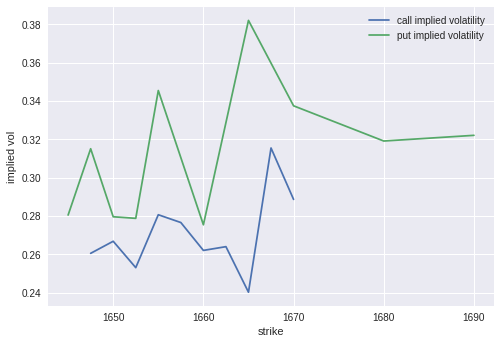

In [11]:
plt.plot(np_option_data12[:,2], np_option_data12[:,4], label = 'call implied volatility')
plt.plot(np_option_data22[:,2], np_option_data22[:,4], label = 'put implied volatility')
plt.ylabel('implied vol')
plt.xlabel('strike')
plt.legend();

No obvious volatility smile observed

In [0]:
'''==========
define a method to seek for a calibrated volatility
============'''

def bsm_calibration(gbm, option_list):
  init_vol = .1 #initial guess
  return so.fmin(error_function, init_vol, 
                 args = (gbm, option_list[i]), disp = 0)[0]


In [13]:
calibrated_volatility1 = bsm_calibration(gbm1,option_list1)
print('>>>>>>>> calibrated volatility for call is ' + str(calibrated_volatility1))

calibrated_volatility2 = bsm_calibration(gbm1,option_list2)
print('>>>>>>>> calibrated volatility for put is ' + str(calibrated_volatility2))

>>>>>>>> calibrated volatility for call is 0.2886328125000007
>>>>>>>> calibrated volatility for put is 0.3220312500000008


In [14]:
gbm1.vol_ratio = calibrated_volatility1

#find calibrated option price
option_list1_calibrated_price = [gbm1.bsm_price(option_list1[i]) for i in range(len(option_list1))]
print('>>>>>>>>> this is option price calculated from calibrated vol')
option_list1_calibrated_price

>>>>>>>>> this is option price calculated from calibrated vol


[75.46362917312808,
 74.17549022564708,
 72.90220244123998,
 71.64374948410477,
 70.40011176192854,
 69.17126645367637,
 67.95718753932545,
 66.75784583149436,
 65.57320900892057,
 64.40324165173593]

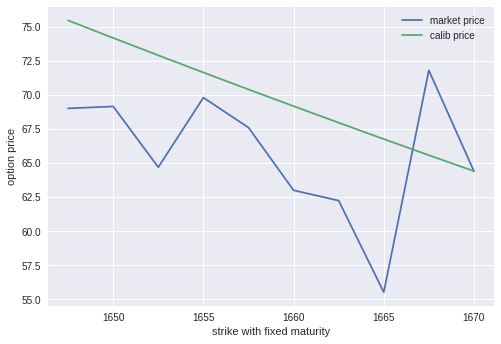

In [19]:
x_co = [option_list1[i].strike for i in range(len(option_list1))]
y_co = [option_list1[i].market_price for i in range(len(option_list1))]
plt.plot(x_co, y_co, label='market price')#not using 'o' here for observation purpose

y_co = option_list1_calibrated_price
plt.plot(x_co, y_co, label = 'calib price')

plt.ylabel('option price')
plt.xlabel('strike with fixed maturity')
plt.legend();

In [16]:
gbm1.vol_ratio = calibrated_volatility2

#find calibrated option price
option_list2_calibrated_price = [gbm1.bsm_price(option_list2[i]) for i in range(len(option_list2))]
print('>>>>>>>>> this is option price calculated from calibrated vol')
option_list2_calibrated_price

>>>>>>>>> this is option price calculated from calibrated vol


[65.07837813511264,
 66.28392924765251,
 67.50281215126017,
 68.7350114821088,
 69.98050953110874,
 72.51131934281295,
 75.0950538008899,
 77.73148899636885,
 83.16139017845114,
 88.79854086513524]

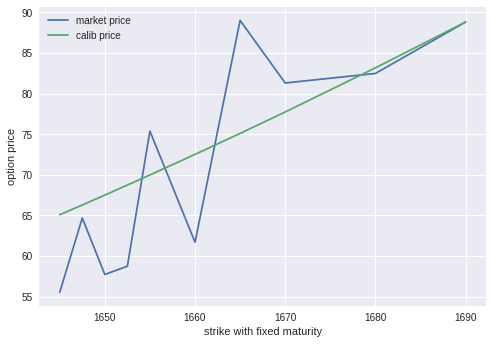

In [18]:
x_co = [option_list2[i].strike for i in range(len(option_list2))]
y_co = [option_list2[i].market_price for i in range(len(option_list2))]
plt.plot(x_co, y_co, label='market price')#not using 'o' for observation purpose

y_co = option_list2_calibrated_price
plt.plot(x_co, y_co, label = 'calib price')

plt.ylabel('option price')
plt.xlabel('strike with fixed maturity')
plt.legend();

as the comparison between the market price and the calibrated price shows, the predicted values under BSM model is does not resemble the market price, which suggests that BSM assumptions may not be suitable in this case.

observation: connecting the market prices with line, the shape of the market prices is similar to the shape of the implied volatility for call and put options

a second set of data is used for this homework, which has a longer maturity